Daily Weather Summary:
Average Temperature: 26.85°C
Maximum Temperature: 30.99°C
Minimum Temperature: 22.17°C
Dominant Weather Condition: Haze

        City Weather Condition  Temperature (°C)            Data Time
0      Delhi              Haze             26.05  2024-10-23 15:01:08
1     Mumbai              Haze             30.99  2024-10-23 14:57:00
2    Chennai              Mist             29.72  2024-10-23 14:59:13
3  Bangalore              Rain             22.17  2024-10-23 14:57:38
4    Kolkata              Haze             25.97  2024-10-23 14:55:52
5  Hyderabad              Haze             26.23  2024-10-23 14:55:35


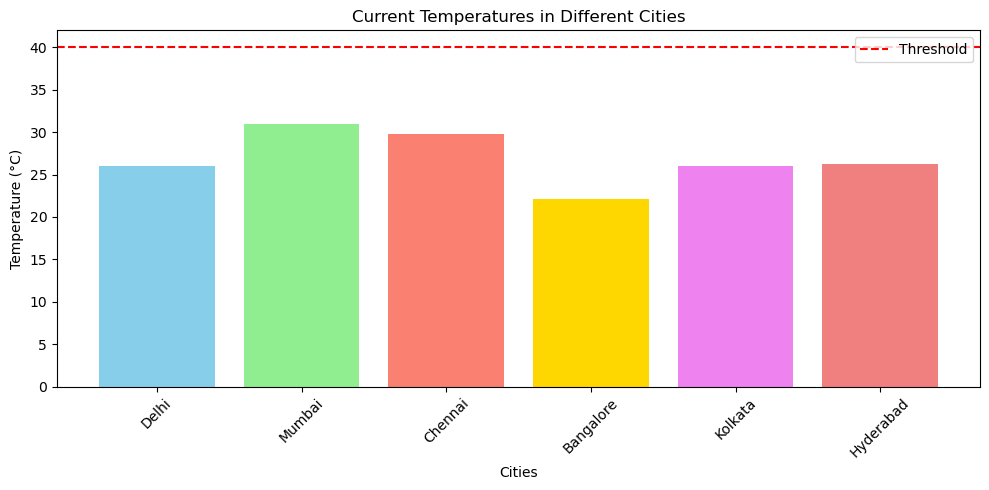

Daily Weather Summary:
Average Temperature: 26.85°C
Maximum Temperature: 30.99°C
Minimum Temperature: 22.17°C
Dominant Weather Condition: Haze

        City Weather Condition  Temperature (°C)            Data Time
0      Delhi              Haze             26.05  2024-10-23 15:01:08
1     Mumbai              Haze             30.99  2024-10-23 15:03:07
2    Chennai              Mist             29.72  2024-10-23 14:59:13
3  Bangalore              Rain             22.17  2024-10-23 14:57:38
4    Kolkata              Haze             25.97  2024-10-23 15:05:55
5  Hyderabad              Haze             26.23  2024-10-23 14:55:35


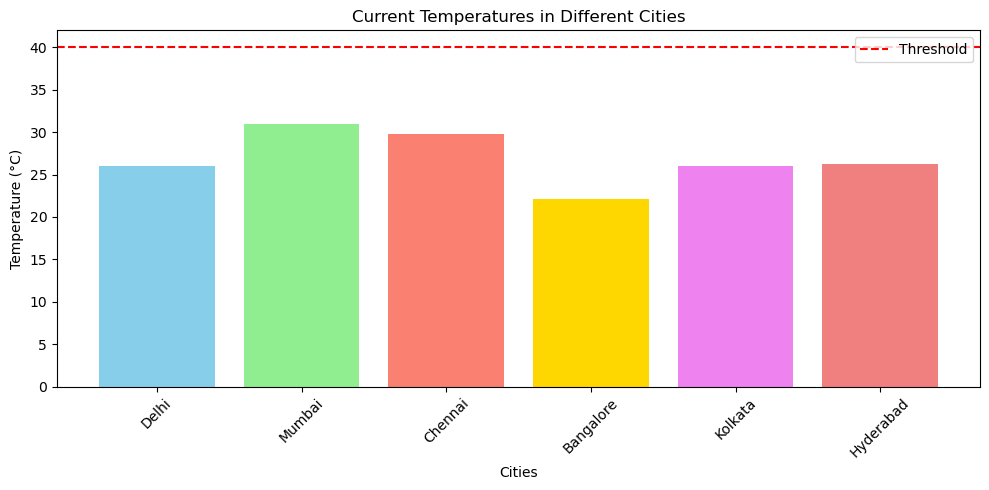

Daily Weather Summary:
Average Temperature: 26.85°C
Maximum Temperature: 30.99°C
Minimum Temperature: 22.17°C
Dominant Weather Condition: Haze

        City Weather Condition  Temperature (°C)            Data Time
0      Delhi              Haze             26.05  2024-10-23 15:01:08
1     Mumbai              Haze             30.99  2024-10-23 15:03:07
2    Chennai              Mist             29.72  2024-10-23 14:59:13
3  Bangalore              Rain             22.17  2024-10-23 14:57:38
4    Kolkata              Haze             25.97  2024-10-23 15:05:55
5  Hyderabad              Haze             26.23  2024-10-23 15:06:48


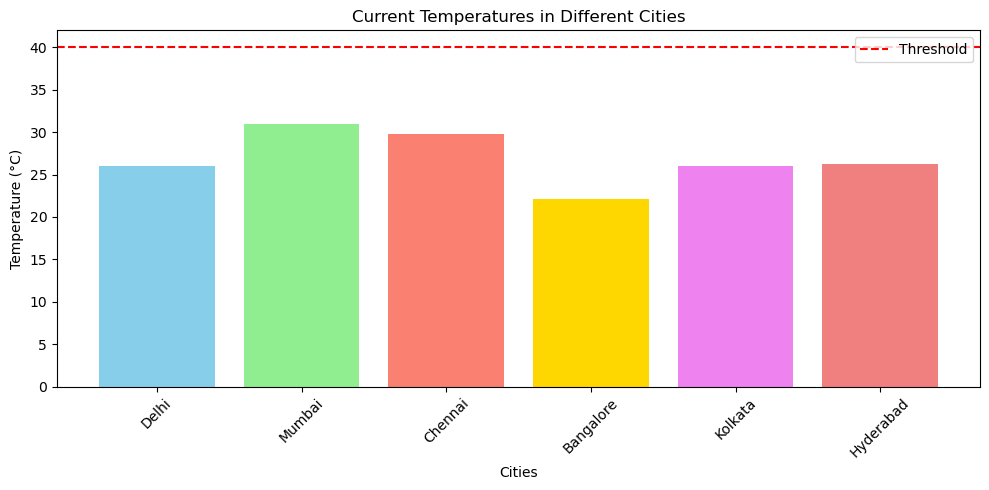

Daily Weather Summary:
Average Temperature: 26.90°C
Maximum Temperature: 30.99°C
Minimum Temperature: 22.17°C
Dominant Weather Condition: Haze

        City Weather Condition  Temperature (°C)            Data Time
0      Delhi              Haze             26.05  2024-10-23 15:01:08
1     Mumbai              Haze             30.99  2024-10-23 15:03:07
2    Chennai              Mist             29.99  2024-10-23 15:07:10
3  Bangalore              Rain             22.17  2024-10-23 15:07:54
4    Kolkata              Haze             25.97  2024-10-23 15:05:55
5  Hyderabad              Haze             26.23  2024-10-23 15:06:48


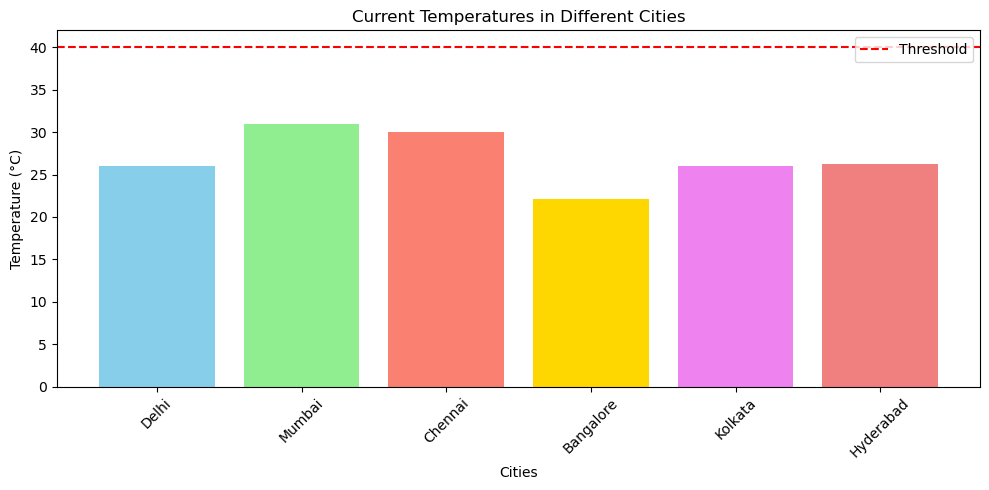

Daily Weather Summary:
Average Temperature: 26.90°C
Maximum Temperature: 30.99°C
Minimum Temperature: 22.17°C
Dominant Weather Condition: Haze

        City Weather Condition  Temperature (°C)            Data Time
0      Delhi              Haze             26.05  2024-10-23 15:01:08
1     Mumbai              Haze             30.99  2024-10-23 15:03:07
2    Chennai              Mist             29.99  2024-10-23 15:07:10
3  Bangalore              Rain             22.17  2024-10-23 15:07:54
4    Kolkata              Haze             25.97  2024-10-23 15:05:55
5  Hyderabad              Haze             26.23  2024-10-23 15:06:48


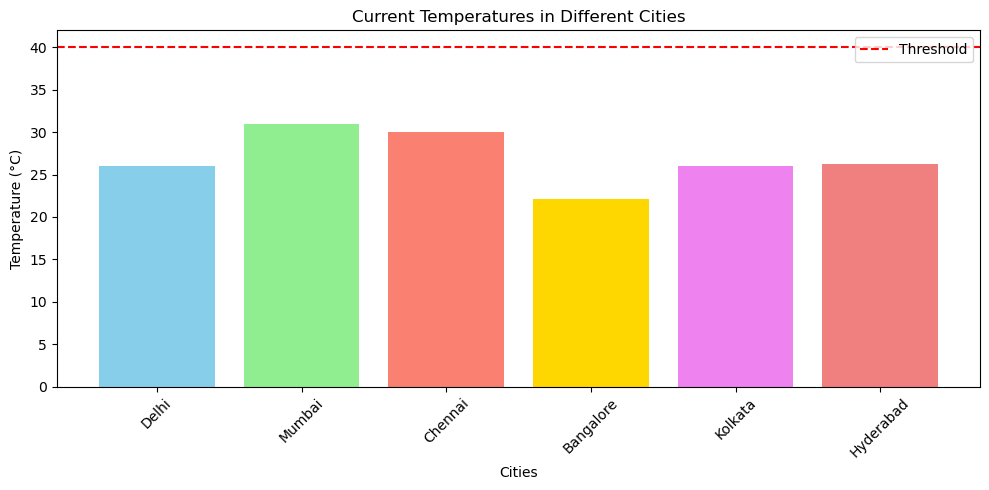

Daily Weather Summary:
Average Temperature: 26.90°C
Maximum Temperature: 30.99°C
Minimum Temperature: 22.17°C
Dominant Weather Condition: Haze

        City Weather Condition  Temperature (°C)            Data Time
0      Delhi              Haze             26.05  2024-10-23 15:14:41
1     Mumbai              Haze             30.99  2024-10-23 15:03:07
2    Chennai              Mist             29.99  2024-10-23 15:07:10
3  Bangalore              Rain             22.17  2024-10-23 15:07:54
4    Kolkata              Haze             25.97  2024-10-23 15:05:55
5  Hyderabad              Haze             26.23  2024-10-23 15:06:48


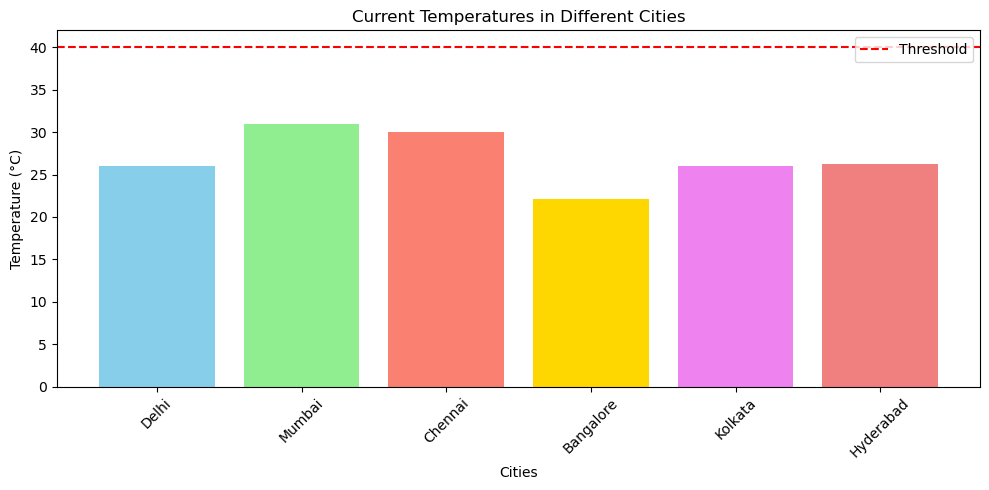

Daily Weather Summary:
Average Temperature: 26.90°C
Maximum Temperature: 30.99°C
Minimum Temperature: 22.17°C
Dominant Weather Condition: Haze

        City Weather Condition  Temperature (°C)            Data Time
0      Delhi              Haze             26.05  2024-10-23 15:14:41
1     Mumbai              Haze             30.99  2024-10-23 15:14:50
2    Chennai              Mist             29.99  2024-10-23 15:07:10
3  Bangalore              Rain             22.17  2024-10-23 15:07:54
4    Kolkata              Haze             25.97  2024-10-23 15:11:50
5  Hyderabad              Haze             26.23  2024-10-23 15:06:48


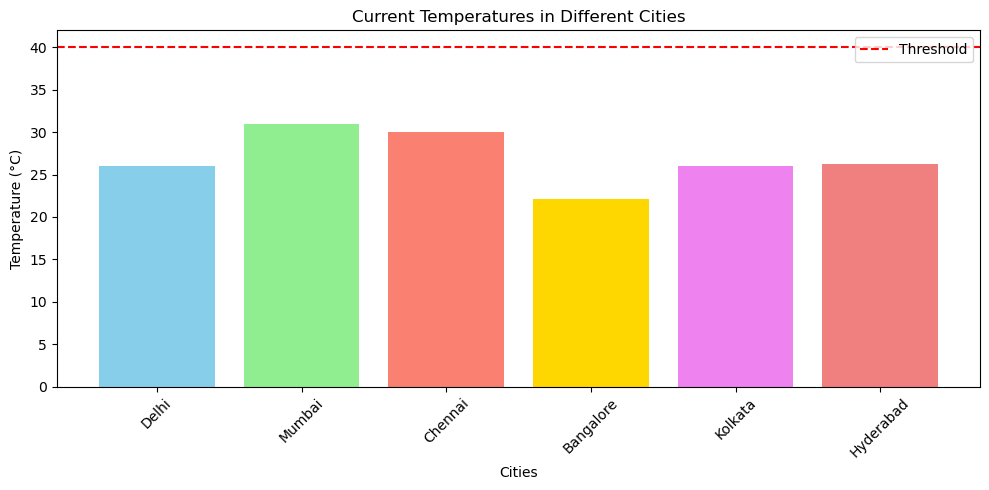

In [ ]:
import requests
from datetime import datetime
import smtplib
from email.mime.text import MIMEText
import matplotlib.pyplot as plt
import pandas as pd
import time

# User-configurable threshold
TEMP_THRESHOLD = 40.0  # in degrees Celsius

# Email configuration
EMAIL_ADDRESS = 'fproject383@gmail.com'
EMAIL_PASSWORD = 'xzwggeysykmogcse'
TO_EMAIL = 'b21ec009@kitsw.ac.in'  # Replace with the recipient's email

# Function to send email notification
def send_email_alert(city, temp_celsius):
    subject = f"Temperature Alert for {city}"
    body = f"ALERT: Temperature in {city} has exceeded {TEMP_THRESHOLD}°C. Current Temperature: {temp_celsius}°C"
    msg = MIMEText(body)
    msg['Subject'] = subject
    msg['From'] = EMAIL_ADDRESS
    msg['To'] = TO_EMAIL

    # Send email
    try:
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            server.login(EMAIL_ADDRESS, EMAIL_PASSWORD)
            server.sendmail(EMAIL_ADDRESS, TO_EMAIL, msg.as_string())
            print(f"Email alert sent for {city}!")
    except Exception as e:
        print(f"Failed to send email: {e}")

# Function to fetch weather data for multiple cities and store in DataFrame
def fetch_weather_data_for_cities(api_key):
    cities = ['Delhi', 'Mumbai', 'Chennai', 'Bangalore', 'Kolkata', 'Hyderabad']
    data_list = []  # List to store weather data

    for city in cities:
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            weather_condition = data['weather'][0]['main']
            temp_kelvin = data['main']['temp']
            dt = data['dt']

            # Convert temperature from Kelvin to Celsius
            temp_celsius = round(temp_kelvin - 273.15, 2)
            data_time = datetime.utcfromtimestamp(dt).strftime('%Y-%m-%d %H:%M:%S')

            # Store the data in a list for DataFrame
            data_list.append({
                'City': city,
                'Weather Condition': weather_condition,
                'Temperature (°C)': temp_celsius,
                'Data Time': data_time
            })

            # Check if the temperature exceeds the threshold
            check_temperature_alert(city, temp_celsius)

        else:
            print(f"Error fetching data for {city}: {response.status_code}")

    # Create a DataFrame from the weather data
    df = pd.DataFrame(data_list)

    # Calculate aggregates (average, min, max temperatures)
    avg_temp = df['Temperature (°C)'].mean()
    max_temp = df['Temperature (°C)'].max()
    min_temp = df['Temperature (°C)'].min()

    # Find the dominant weather condition
    dominant_condition = df['Weather Condition'].mode()[0]

    # Print the daily aggregates
    print("Daily Weather Summary:")
    print(f"Average Temperature: {avg_temp:.2f}°C")
    print(f"Maximum Temperature: {max_temp:.2f}°C")
    print(f"Minimum Temperature: {min_temp:.2f}°C")
    print(f"Dominant Weather Condition: {dominant_condition}")
    print()

    return df

# Function to check temperature against threshold and trigger alert per city
def check_temperature_alert(city, temp_celsius):
    if temp_celsius > TEMP_THRESHOLD:
        send_email_alert(city, temp_celsius)  # Send email alert immediately when threshold is breached

# Function to visualize daily weather data
def visualize_weather_data(df):
    # Define a color palette for the cities
    colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet', 'lightcoral']  # Different colors for each city

    # Create a bar plot for temperatures with different colors for each city
    plt.figure(figsize=(10, 5))
    plt.bar(df['City'], df['Temperature (°C)'], color=colors[:len(df)])  # Use the color list
    plt.axhline(y=TEMP_THRESHOLD, color='r', linestyle='--', label='Threshold')
    plt.title('Current Temperatures in Different Cities')
    plt.xlabel('Cities')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)  # Rotate city names for better readability
    plt.legend()
    plt.tight_layout()  # Adjust layout for better fit
    plt.show()

while True:
    # Replace 'your_api_key_here' with your actual API key
    api_key = '9b8c1f6995fbaeaf7b936a17d2d25309'
    weather_df = fetch_weather_data_for_cities(api_key)

    # Print the DataFrame
    print(weather_df)

    # Visualize the weather data
    visualize_weather_data(weather_df)
    time.sleep(3000) # 5 min